**Working with images**

**Grayscale images:** In the next exercise, you will build a k-NN classifier for the MNIST database which is a set of 60 thousand grayscale images of handwritten digits. The images have been preprocessed, and digits have approximately the same size, position, orientation, and a uniform white background.

We will now see how to load and plot the mnist-img.png image which is a handwritten nine taken from this dataset. To achieve this, we will use the Pillow (PIL) library. Note that there are alternative ways (ex. the imread() function from Matplotlib or Scipy) but many depend on the PIL library internally.

The Pillow library implements an open() function in its Image module. Let’s use it to load our image into a pillow_img variable

In [1]:
from PIL import Image

# Load the image using PIL
pillow_img = Image.open("c4_mnist-img.png")

# Print its type
print("Type:", type(pillow_img))

Type: <class 'PIL.PngImagePlugin.PngImageFile'>


In this code, we load the image into a pillow_img variable and print its type. As we can see, it’s a PngImageFile object. We cannot use this object in our machine learning tasks directly, but we can easily convert it into a Numpy array with the np.array() function



In [2]:
import numpy as np

# Load it into a Numpy array
img = np.array(pillow_img)

# Print its type
print('Type:', type(img))

Type: <class 'numpy.ndarray'>


In [3]:
# We now have an img variable that represents our image. Let’s take a look at it

print('shape:', img.shape)
print('min:', img.min(), 'max:', img.max())
print('dtype:', img.dtype)

shape: (28, 28)
min: 0 max: 255
dtype: uint8


As we can see, it’s a 2-dimensional array of shape 28 by 28. In fact, each value in this array corresponds to a pixel in the image and values range between 0 and 255. For this reason, its data type is uint8 since 8 bits (or one byte) are sufficient to store this range of values - each bit can take 2 values: 0 or 1, so 8 bits can take 2*2*2*2*2*2*2*2=2^8=256 values ex. from 0 to 255.

We can now plot the image using the imshow() function from Matplotlib

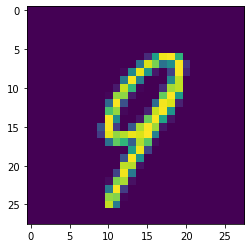

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot the image
plt.imshow(img)
plt.show()

The code returns a plot of the handwritten nine

Each value in the img array is a pixel intensity. The imshow() function uses objects called colormaps to plot the array of pixel intensities. By default, it uses this yellow-purple scale called viridis. To get the list of colormaps available in Matplotlib, you can check the colormaps reference.

In our case, we want to use the grayscale colormap. To achieve this, we can use the cmap argument and set it to plt.cm.gray

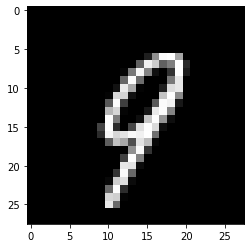

In [5]:
plt.imshow(img, cmap=plt.cm.gray)
plt.show()

 However, the grayscale usually denote white intensity. In other words, the image from above corresponds to the negative image.

To solve this, we can simply use the reversed grayscale **gray_r**

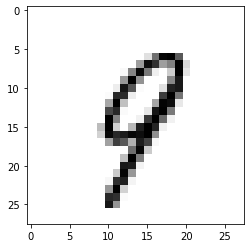

In [6]:
# gray_r means reversed grayscaled
plt.imshow(img, cmap=plt.cm.gray_r)
plt.show()

Note that the y-axis is reversed in the plot - the origin at (0,0) is in the top left corner instead of the bottom left one. This is because we are plotting a 2-dimensional Numpy array. Hence, we shouldn’t think in terms of x- and y-axis but rather in terms of row and column positions. Here’s the image from above, but with the indexes that correspond to the Numpy array.

In [7]:
#from IPython.display import Image
#Image(filename="nine.png")

TypeError: 'module' object is not callable

For instance, the pixel at img[6,17] (6th row and 17th column) corresponds roughly to the top of the handwritten nine.

Let’s now see how to work with color images.

**Color images**
In the next subject, we will build an image classifier for the CIFAR-10 database which contains 32 by 32 color images. The number 10 in the name corresponds to the number of categories. For instance, we will classify images of cars, ships, horses, airplanes. Here are some images from the dataset.

We will now work with the cifar-img.png image which is the image of a horse in the sample images from above (in the top right corner).

Let’s start by loading it using the open() function from PIL

In [8]:
# Load the image using PIL
pillow_img = Image.open('c4_cifar-img.png')

# Convert into Numpy array
img = np.array(pillow_img)

In [9]:
print('shape:', img.shape) # (32, 32, 3)
print('dtype:', img.dtype) # uint8

shape: (32, 32, 3)
dtype: uint8


This code is similar to what we saw for grayscale images. We load the cifar-img.png file and then convert it into a Numpy array. Again, let’s print its shape and data type



The only difference with grayscale images is the shape of the array which is now 3-dimensional with three values in the last dimension. This is because the image uses the RGB color model which associates pixels with three values that correspond to the red, green and blue color channels. There are other possible representations used in image analysis such as the HLS one, but we will only work with RGB images in this course.

It’s interesting to note that the color channels correspond to the last dimension of the img array. Later in this course, we will learn about deep learning, and we will use the TensorFlow library which also uses this (height, width, channels) convention.

Let’s plot the image using imshow(). This time, we don’t need to use a colormap. The function automatically uses the RGB model when we pass a 3-dimensional array with three channels.

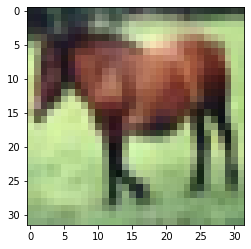

In [11]:
# Plot the image
plt.imshow(img)
plt.show()

In the image from above, the imshow() function merges the three channels to create the color, but we can easily visualize them separately by plotting each component using the appropriate colormap.

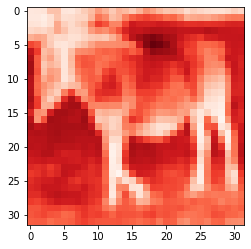

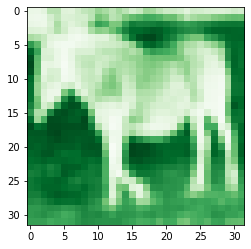

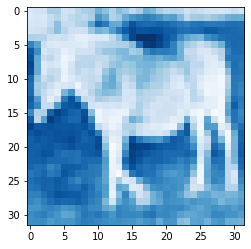

In [12]:
# Plot the Red channel
red_channel = img[:,:,0] # First channel in RGB
plt.imshow(red_channel, cmap=plt.cm.Reds) # Reds colormap
plt.show()

# Plot the Green channel
green_channel = img[:,:,1] # Second channel in RGB
plt.imshow(green_channel, cmap=plt.cm.Greens) # Greens colormap
plt.show()

# Plot the Blue channel
blue_channel = img[:,:,2] # Third channel in RGB
plt.imshow(blue_channel, cmap=plt.cm.Blues) # Blues colormap
plt.show()


This code is also a nice way to visualize the 3-dimensional img array. You can think of it as three 32 by 32 grids stacked on top of each other. In this visualization, img[16, 1, 2] denotes the pixel at (16, 1) in the third grid which corresponds to the horse nostrils in the blue channel.

Summary
In this unit, we saw how to load images into Numpy arrays using the open() function from PIL, and how to plot them using the imshow() one from Pyplot. In particular, we saw that

Grayscale images correspond to 2-dimensional (height, width) arrays of white intensity values
Color images correspond to 3-dimensional (height, width, channels) arrays
Pixel values vary between 0 and 255 and we store them with the uint8 data type
In the next unit, we will see how to convert these arrays of pixels into a set of features that we can use in our machine learning algorithms.